## Tumour Analysis and Modelling using Machine Learning
In this notebook, we will explore an OpenML dataset containing information about tumour characteristics and their classification as benign or malignant.
The goal is to identify the best machine learning model to predict whether a tumour is benign or malignant, and to tune that model for optimal results.


In [19]:
import openml

dataset_id = 1510

dataset = openml.datasets.get_dataset(dataset_id)

X, y, _, attribute_names = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')

data = X.copy()
data['target'] = y

print("Dimensiones del dataset:", data.shape)
print("Primeras filas del dataset:")
print(data.head())

print("#################################")
print(data.info())

Dimensiones del dataset: (569, 31)
Primeras filas del dataset:
      V1     V2      V3      V4       V5       V6      V7       V8      V9  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

       V10  ...    V22     V23     V24     V25     V26     V27     V28  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

      V29      V30  tar

### About the data
We note that the dataset has no missing values (`NaN`) and contains structured information. Before we continue, we will assign descriptive names to the columns to make them easier to understand.

In [20]:
column_names = [
    "mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness",
    "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension",
    "radius error", "texture error", "perimeter error", "area error", "smoothness error",
    "compactness error", "concavity error", "concave points error", "symmetry error", "fractal dimension error",
    "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness",
    "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension",
    "target"
]

data.columns = column_names

print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

target
1    357
2    212
Name: count, dtype: int64


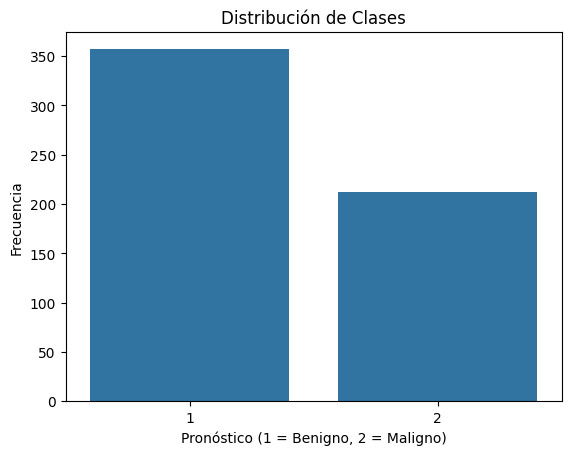

In [21]:
print(data['target'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['target'])
plt.title('Distribución de Clases')
plt.xlabel('Pronóstico (1 = Benigno, 2 = Maligno)')
plt.ylabel('Frecuencia')
plt.show()


#### Separation of Training and Test Data
We split the data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data set size:", X_train.shape)
print("Test data set size:", X_test.shape)


Training data set size: (455, 30)
Test data set size: (114, 30)


#### Testing different models
Once we have separated and prepared our data, we are going to test different models so that we can use the one that gives us the best result.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))


              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        71
     Maligno       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg_model = LogisticRegression(max_iter=5000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Results Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, target_names=['Benigno', 'Maligno']))


Results Logistic Regression:
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        71
     Maligno       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("Results Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['Benigno', 'Maligno']))


Results Support Vector Machine (SVM):
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        71
     Maligno       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Resulsts Gradient Boosting:")
print(classification_report(y_test, y_pred_gb, target_names=['Benigno', 'Maligno']))


Resulsts Gradient Boosting:
              precision    recall  f1-score   support

     Benigno       0.96      0.97      0.97        71
     Maligno       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')
print("Average Accuracy with cross-validation (Random Forest):", cv_scores.mean())

cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
print("Average Accuracy with cross-validation (Logistic Regression):", cv_scores.mean())

cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print("Average Accuracy with cross-validation (SVM):", cv_scores.mean())

cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')
print("Average Accuracy with cross-validation (Gradient Boosting):", cv_scores.mean())


Average Accuracy with cross-validation (Random Forest): 0.9560937742586555
Average Accuracy with cross-validation (Logistic Regression): 0.9507995652848935
Average Accuracy with cross-validation (SVM): 0.9455364073901569
Average Accuracy with cross-validation (Gradient Boosting): 0.9613724576929048


#### Choice of model
We can see after several tests that the best algorithm for our case, although by very little difference, is Gradient Boosting, which achieves very good results in predicting whether a tumour is benign or malignant.
The aim now is to try to refine the model to get it even closer to perfection. 


In [37]:
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],      # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'max_depth': [3, 4, 5],               # Profundidad de los árboles
    'min_samples_split': [2, 5, 10],      # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]         # Muestras mínimas en una hoja
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,              # Validación cruzada de 5 folds
    scoring='accuracy',
    verbose=0,
    n_jobs=-1          # Usar todos los núcleos disponibles
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

from sklearn.metrics import classification_report
print("Best Gradient Boosting Model Results:")
print(classification_report(y_test, y_pred_best_gb, target_names=['Benigno', 'Maligno']))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Gradient Boosting Model Results:
              precision    recall  f1-score   support

     Benigno       0.96      0.97      0.97        71
     Maligno       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Parameters conclusion
We can see after the evaluation of this cell that the default parameters are the ones that classify the best the data. 

In [63]:
import warnings
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore", category=UserWarning)

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm_filtered = lgbm_model.predict(X_test)

print("Results for LightGBM with the selected features:")
print(classification_report(y_test, y_pred_lgbm_filtered, target_names=['Benigno', 'Maligno']))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### Get feature importance
We will take a look at the importance of the diferent features in order to see if we can minimize the size of the features in order to make our model more efficient and maybe even improving the performance. 

                    Feature  Importance
7       mean concave points    0.462979
27     worst concave points    0.255853
20             worst radius    0.060649
23               worst area    0.040891
22          worst perimeter    0.039990
21            worst texture    0.032342
1              mean texture    0.028574
26          worst concavity    0.019309
16          concavity error    0.016487
13               area error    0.011108
10             radius error    0.005589
9    mean fractal dimension    0.003759
17     concave points error    0.002998
5          mean compactness    0.002488
12          perimeter error    0.002378
24         worst smoothness    0.002181
19  fractal dimension error    0.002023
3                 mean area    0.001985
4           mean smoothness    0.001553
25        worst compactness    0.001420
2            mean perimeter    0.001122
6            mean concavity    0.001059
15        compactness error    0.000835
28           worst symmetry    0.000728


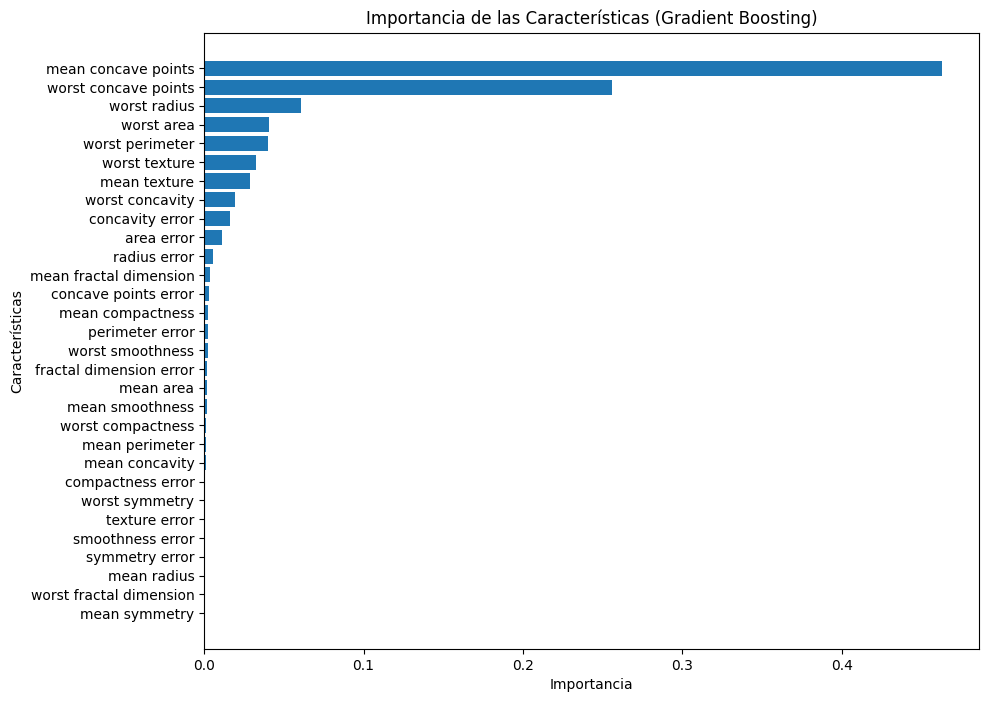

In [35]:
import pandas as pd
importances = best_gb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Importancia de las Características (Gradient Boosting)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.show()


                    Feature  Importance
21            worst texture         241
27     worst concave points         191
1              mean texture         186
7       mean concave points         137
22          worst perimeter         135
13               area error         115
0               mean radius         105
23               worst area         102
20             worst radius          97
26          worst concavity          82
28           worst symmetry          80
15        compactness error          76
11            texture error          76
24         worst smoothness          74
6            mean concavity          70
10             radius error          65
18           symmetry error          54
4           mean smoothness          50
9    mean fractal dimension          45
25        worst compactness          43
14         smoothness error          39
17     concave points error          39
5          mean compactness          38
8             mean symmetry          37


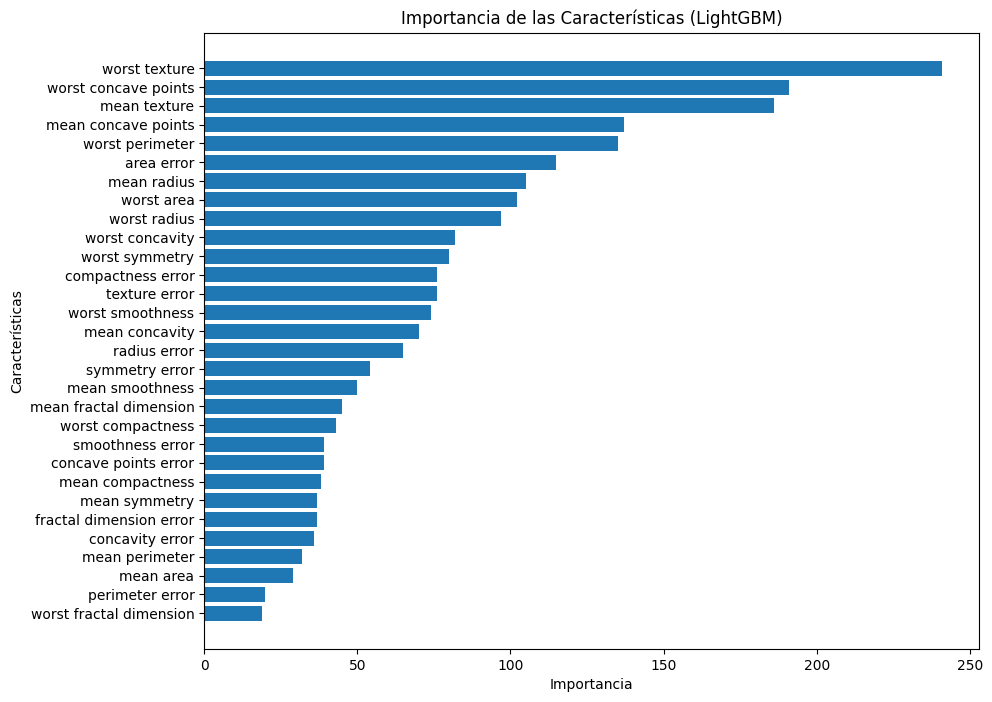

In [ ]:
"""
import pandas as pd
importances = lgbm_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.show()
"""

In [36]:
threshold = 0.001
important_features = importance_df[importance_df['Importance'] > threshold]['Feature']

X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

print("Selected features:", list(important_features))
print("New dimensions of X_train:", X_train_filtered.shape)


Selected features: ['mean concave points', 'worst concave points', 'worst radius', 'worst area', 'worst perimeter', 'worst texture', 'mean texture', 'worst concavity', 'concavity error', 'area error', 'radius error', 'mean fractal dimension', 'concave points error', 'mean compactness', 'perimeter error', 'worst smoothness', 'fractal dimension error', 'mean area', 'mean smoothness', 'worst compactness', 'mean perimeter', 'mean concavity']
New dimensions of X_train: (455, 22)


In [55]:
import warnings
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore", category=UserWarning)

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train_filtered, y_train)

y_pred_lgbm_filtered = lgbm_model.predict(X_test_filtered)

print("Results for LightGBM with the selected features:")
print(classification_report(y_test, y_pred_lgbm_filtered, target_names=['Benigno', 'Maligno']))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3332
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gb_model_filtered = GradientBoostingClassifier(random_state=42)
gb_model_filtered.fit(X_train_filtered, y_train)

y_pred_filtered = gb_model_filtered.predict(X_test_filtered)

print("Resultados del modelo con características seleccionadas:")
print(classification_report(y_test, y_pred_filtered, target_names=['Benigno', 'Maligno']))

accuracy_gb = accuracy_score(y_test, y_pred_filtered)
precision_gb_maligno = precision_score(y_test, y_pred_filtered, pos_label='2')
recall_gb_maligno = recall_score(y_test, y_pred_filtered, pos_label='2')
f1_gb_maligno = f1_score(y_test, y_pred_filtered, pos_label='2')

Resultados del modelo con características seleccionadas:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        71
     Maligno       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [57]:
# LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm_filtered)
precision_lgbm_maligno = precision_score(y_test, y_pred_lgbm_filtered, pos_label='2')
recall_lgbm_maligno = recall_score(y_test, y_pred_lgbm_filtered, pos_label='2')
f1_lgbm_maligno = f1_score(y_test, y_pred_lgbm_filtered, pos_label='2')


In [60]:
results = {
    'Modelo': ['Gradient Boosting', 'LightGBM'],
    'Accuracy': [accuracy_gb, accuracy_lgbm],
    'Precision (Maligno)': [precision_gb_maligno, precision_lgbm_maligno],
    'Recall (Maligno)': [recall_gb_maligno, recall_lgbm_maligno],
    'F1-Score (Maligno)': [f1_gb_maligno, f1_lgbm_maligno]
}

results_df = pd.DataFrame(results)
print(results_df)


              Modelo  Accuracy  Precision (Maligno)  Recall (Maligno)  \
0  Gradient Boosting  0.964912              0.97561          0.930233   
1           LightGBM  0.973684              0.97619          0.953488   

   F1-Score (Maligno)  
0            0.952381  
1            0.964706  


## Final conclusions

As we can see the best model overall, after the filtering of the data, is the LightGBM model which performs a little bit better than the Gradient Boosting in all the categories taken into account. 